In [7]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

from laboneq.dsl.quantum import QPU
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon
from helpers.sqil_transmon.operations import SqilTransmonOperations

from laboneq_applications.experiments.options import (
    ResonatorSpectroscopyExperimentOptions,
)
from laboneq_applications.core import validation
from laboneq.dsl.enums import AcquisitionType
from laboneq.simple import Experiment, SweepParameter, dsl

from laboneq.dsl.quantum.quantum_element import QuantumElement
from numpy.typing import ArrayLike

%matplotlib inline

In [8]:
params = {
    "readout_lo_frequency": 7.2e9,
    "drive_lo_frequency": 5e9,
    "ext_lo": 11e9
}

### Resonator spectroscopy

In [9]:
import numpy as np
from rr_spec import RRSpec, ResonatorSpectroscopyExperimentOptions

rr_spec = RRSpec()
options = ResonatorSpectroscopyExperimentOptions()
options.count = 800

result = rr_spec.run(
    # [np.linspace(7e9, 8e9, 2001)],
    [rr_spec.sweep_around("readout_resonator_frequency", 20e6, n_points=201)],
    # sweeps={"readout_amplitude": np.linspace(0.003, 0.1, 41)},
    # sweeps={"index": np.arange(200)},
    qu_ids=["q0"],
    options=options,
    update_params=True,
)

2025-09-14 20:07:08,523 - INFO - Successfully connected to zi


[2025.09.14 20:07:08.529] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.09.14 20:07:08.531] INFO    VERSION: laboneq 2.57.0
[2025.09.14 20:07:08.532] INFO    Connecting to data server at localhost:8004
[2025.09.14 20:07:08.535] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.09.14 20:07:08.541] INFO    Configuring the device setup
[2025.09.14 20:07:08.549] INFO    The device setup is configured


2025-09-14 20:07:08,561 - INFO - Setting up instruments
2025-09-14 20:07:08,563 - INFO - Before exp


[2025.09.14 20:07:08.576] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.09.14 20:07:08.577] INFO    Resolved modulation type of oscillator 'q0_drive_ef_osc' on signal 'q0/drive_ef' to HARDWARE
[2025.09.14 20:07:08.578] INFO    Starting LabOne Q Compiler run...
[2025.09.14 20:07:08.609] INFO    Schedule completed. [0.028 s]
[2025.09.14 20:07:08.635] INFO    Code generation completed for all AWGs. [0.026 s]
[2025.09.14 20:07:08.637] INFO    Completed compilation step 1 of 1. [0.057 s]
[2025.09.14 20:07:08.641] INFO     ──────────────────────────────────────────────────────────────── 
[2025.09.14 20:07:08.642] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.09.14 20:07:08.642] INFO     ──────────────────────────────────────────────────────────────── 
[2025.09.14 20:07:08.643] INFO      shfqc_0        0         21            0           1      8000  
[2025.09.14 20:07:08.644] INFO      shfqc_0_sg    

KeyboardInterrupt: 

### Qubit specroscopy

2025-09-14 19:13:20,431 - INFO - Successfully connected to zi


[2025.09.14 19:13:20.437] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.09.14 19:13:20.439] INFO    VERSION: laboneq 2.57.0
[2025.09.14 19:13:20.440] INFO    Connecting to data server at localhost:8004
[2025.09.14 19:13:20.443] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.09.14 19:13:20.449] INFO    Configuring the device setup
[2025.09.14 19:13:20.456] INFO    The device setup is configured


2025-09-14 19:13:20,467 - INFO - Setting up instruments
2025-09-14 19:13:20,469 - INFO - Before exp


[2025.09.14 19:13:20.480] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.09.14 19:13:20.481] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.09.14 19:13:20.482] INFO    Resolved modulation type of oscillator 'q0_drive_ef_osc' on signal 'q0/drive_ef' to HARDWARE
[2025.09.14 19:13:20.483] INFO    Starting LabOne Q Compiler run...
[2025.09.14 19:13:20.768] INFO    Schedule completed. [0.283 s]
[2025.09.14 19:13:20.890] INFO    Code generation completed for all AWGs. [0.121 s]
[2025.09.14 19:13:20.891] INFO    Completed compilation step 1 of 1. [0.407 s]
[2025.09.14 19:13:20.894] INFO     ──────────────────────────────────────────────────────────────── 
[2025.09.14 19:13:20.895] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.09.14 19:13:20.895] INFO     ──────────────────────────────────────────────────────────────── 
[2025.09.14 19:13:

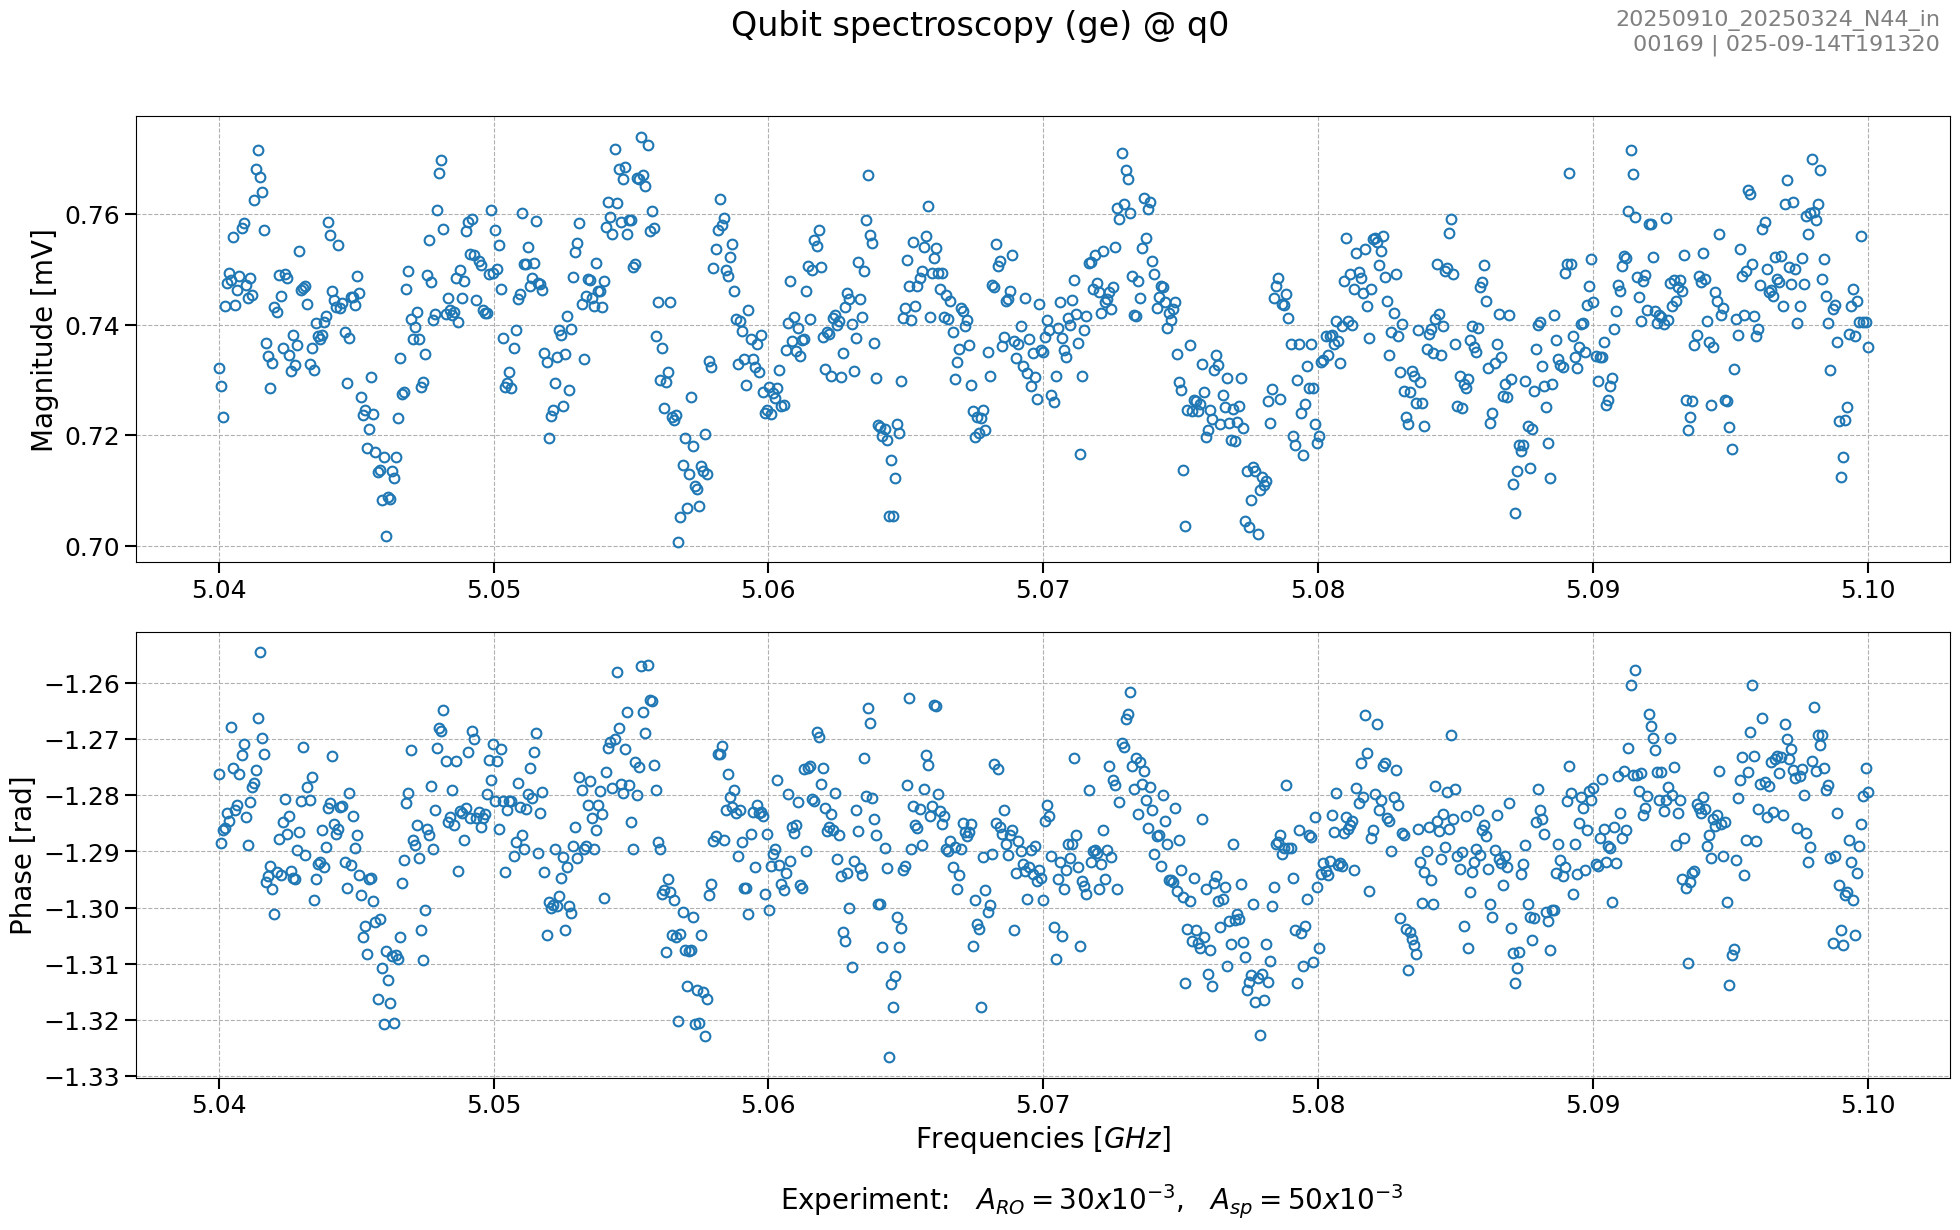

In [ ]:
import numpy as np
from qu_spec import QuSpec, QuSpecOptions
from laboneq.dsl.enums import AveragingMode, AcquisitionType

qu_spec = QuSpec()
options = QuSpecOptions()
options.count = 800
options.averaging_mode = AveragingMode.CYCLIC
options.acquisition_type = AcquisitionType.SPECTROSCOPY

result = qu_spec.run(
    [np.linspace(5.04e9, 5.1e9, 801)], 
    # [qu_spec.sweep_around("resonance_frequency_ge", 10e6, n_points=201)],
    # sweeps={"spectroscopy_amplitude": np.linspace(0.8,1,5)},
    # sweeps={"index": np.arange(3)},
    # sweeps={"spectroscopy_amplitude": np.linspace(0.003, 1, 70)},
    transition="ge",
    qu_ids=["q0"],
    options=options,
    update_params=True,
    relevant_params=["readout_amplitude", "spectroscopy_amplitude"],
    # pulse_sheet=0.3e-6
)

### Time Rabi

In [ ]:
import numpy as np
from time_rabi import TimeRabi, TimeRabiOptions
from laboneq.dsl.enums import AcquisitionType, AveragingMode

time_rabi = TimeRabi()
options = TimeRabiOptions()
options.count = 2**10
options.acquisition_type = AcquisitionType.SPECTROSCOPY

result = time_rabi.run(
    [np.linspace(20e-9, 300e-9, 53)],
    # sweeps={"readout_range_out": [-30, -20], "readout_amplitude": [0.5, 1]},
    # sweeps={"resonance_frequency_ge": np.linspace(qu_freq-5e6, qu_freq+5e6, 11)},
    transition="ge",
    qu_ids=["q0"],
    options=options,
    pulse_sheet=150e-9
)

2025-09-14 20:31:24,383 - INFO - Successfully connected to zi


[2025.09.14 20:31:24.388] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.09.14 20:31:24.390] INFO    VERSION: laboneq 2.57.0
[2025.09.14 20:31:24.393] INFO    Connecting to data server at localhost:8004
[2025.09.14 20:31:24.400] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.09.14 20:31:24.408] INFO    Configuring the device setup
[2025.09.14 20:31:24.416] INFO    The device setup is configured


2025-09-14 20:31:24,418 - INFO - Setting up instruments
2025-09-14 20:31:24,420 - INFO - Before exp


[2025.09.14 20:31:24.438] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.09.14 20:31:24.439] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.09.14 20:31:24.440] INFO    Resolved modulation type of oscillator 'q0_drive_ef_osc' on signal 'q0/drive_ef' to HARDWARE
[2025.09.14 20:31:24.441] INFO    Starting LabOne Q Compiler run...
[2025.09.14 20:31:24.453] INFO    Schedule completed. [0.010 s]
[2025.09.14 20:31:24.461] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.09.14 20:31:24.464] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.09.14 20:31:24.468] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.09.14 2

LabOneQException: Attempting to emit playZero(16), which is below the minimum waveform length 32 of device 'SHFQA' (sample multiple is 16)

### Qubit temperature

2025-09-14 18:21:34,789 - INFO - Successfully connected to zi


[2025.09.14 18:21:34.794] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.09.14 18:21:34.796] INFO    VERSION: laboneq 2.57.0
[2025.09.14 18:21:34.798] INFO    Connecting to data server at localhost:8004
[2025.09.14 18:21:34.805] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.09.14 18:21:34.812] INFO    Configuring the device setup
[2025.09.14 18:21:34.819] INFO    The device setup is configured


2025-09-14 18:21:34,822 - INFO - Setting up instruments
2025-09-14 18:21:34,823 - INFO - Before exp


[2025.09.14 18:21:34.835] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.09.14 18:21:34.836] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.09.14 18:21:34.837] INFO    Resolved modulation type of oscillator 'q0_drive_ef_osc' on signal 'q0/drive_ef' to HARDWARE
[2025.09.14 18:21:34.838] INFO    Starting LabOne Q Compiler run...
[2025.09.14 18:21:34.851] INFO    Schedule completed. [0.012 s]
[2025.09.14 18:21:34.862] INFO    Requested to compress pulse(s) rx_pulse_1 which has(have) either no, or too short, constant sections. Skipping compression
[2025.09.14 18:21:34.866] INFO    Requested to compress pulse(s) rx_pulse_1 which has(have) either no, or too short, constant sections. Skipping compression
[2025.09.14 18:21:34.868] INFO    Requested to compress pulse(s) rx_pulse_1 which has(have) either no, or too short, constant sections. Skipping compression
[2025.09.14 1

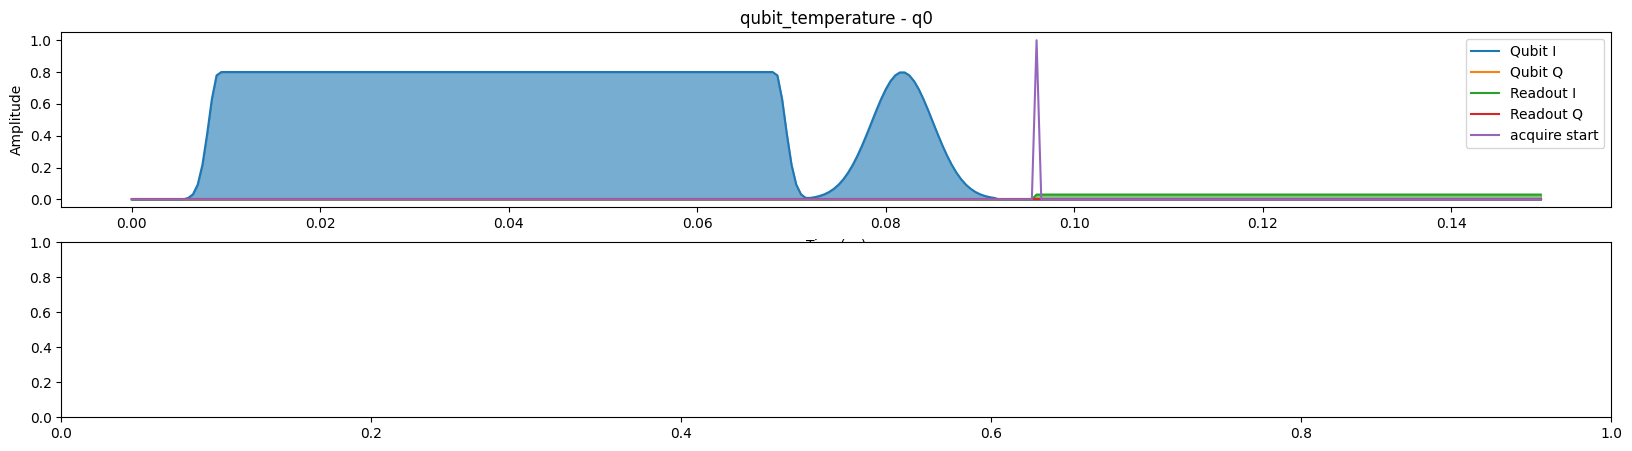

[2025.09.14 18:21:35.243] INFO    Recompiling the experiment due to missing extra information in the compiled experiment. Compile with `OUTPUT_EXTRAS=True` and `MAX_EVENTS_TO_PUBLISH=1000` to bypass this step with a small impact on the compilation time.
[2025.09.14 18:21:35.245] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.09.14 18:21:35.246] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.09.14 18:21:35.247] INFO    Resolved modulation type of oscillator 'q0_drive_ef_osc' on signal 'q0/drive_ef' to HARDWARE
[2025.09.14 18:21:35.248] INFO    Starting LabOne Q Compiler run...
[2025.09.14 18:21:35.267] INFO    Schedule completed. [0.017 s]
[2025.09.14 18:21:35.278] INFO    Requested to compress pulse(s) rx_pulse_1 which has(have) either no, or too short, constant sections. Skipping compression
[2025.09.14 18:21:35.279] INFO    Requested to compress pulse(s) rx_pulse

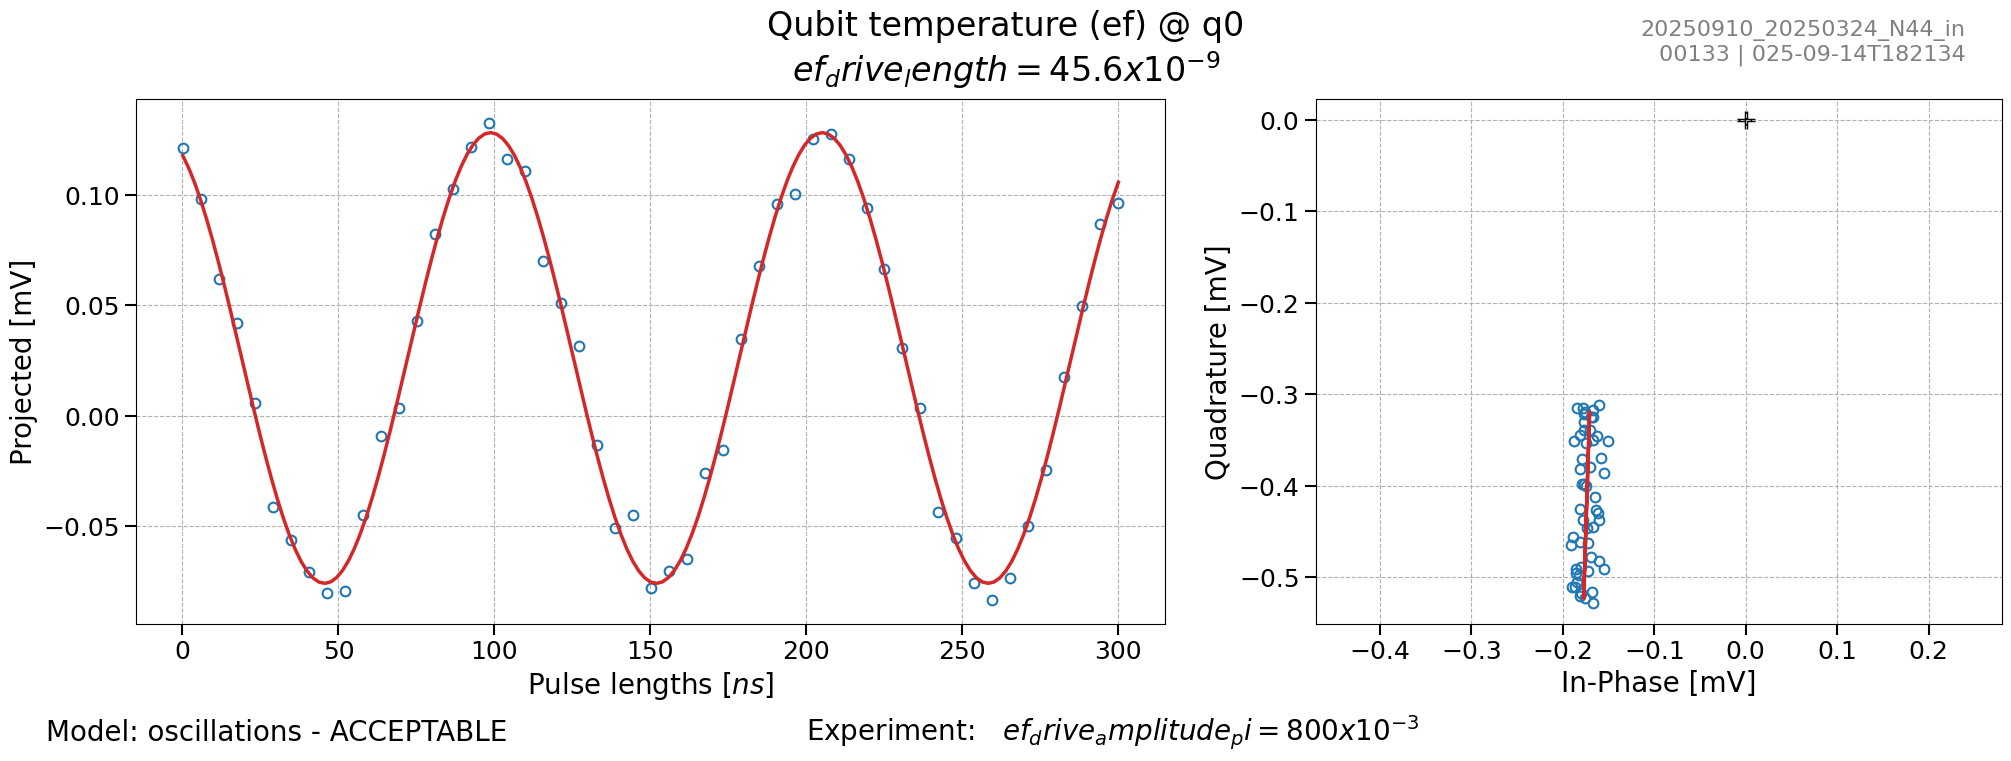

In [ ]:
import numpy as np
from qubit_temperature import QubitTemperature, QubitTemperatureOptions
from laboneq.dsl.enums import AcquisitionType, AveragingMode

qubit_temp = QubitTemperature()
options = QubitTemperatureOptions()
options.count = 2**10
options.acquisition_type = AcquisitionType.SPECTROSCOPY

result = qubit_temp.run(
    [np.linspace(1e-10, 300e-9, 53)],
    # sweeps={"readout_range_out": [-30, -20], "readout_amplitude": [0.5, 1]},
    # sweeps={"resonance_frequency_ge": np.linspace(qu_freq-5e6, qu_freq+5e6, 11)},
    qu_ids=["q0"],
    options=options,
    pulse_sheet=150e-9
)

### T1

In [ ]:
from sqil_experiments.measurements.T1 import T1
import numpy as np
from laboneq_applications.experiments.options import (
    TuneupExperimentOptions,
)
from laboneq.dsl.enums import AcquisitionType

T1_value = 50e-6

time = np.hstack(
    [
        np.linspace(0, T1_value, 11),
        np.logspace(np.log(T1_value * 1.1), np.log(5 * T1_value), 11, base=np.e),
    ]
)

options =TuneupExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**11


T1_exp = T1()
result = T1_exp.run(
    [time],
    # sweeps={"index": np.arange(2)},
    options=options,
)

2025-09-14 18:51:17,638 - INFO - Successfully connected to zi


[2025.09.14 18:51:17.644] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.09.14 18:51:17.655] INFO    VERSION: laboneq 2.57.0
[2025.09.14 18:51:17.657] INFO    Connecting to data server at localhost:8004
[2025.09.14 18:51:17.660] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.09.14 18:51:17.666] INFO    Configuring the device setup
[2025.09.14 18:51:17.674] INFO    The device setup is configured


2025-09-14 18:51:17,685 - INFO - Setting up instruments
2025-09-14 18:51:17,686 - INFO - Before exp


{'can_compress': True, 'function': 'gaussian_square', 'width': 7.989238845132805e-08}
{'can_compress': True, 'function': 'gaussian_square', 'width': 7.989238845132805e-08}
[2025.09.14 18:51:17.708] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.09.14 18:51:17.709] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.09.14 18:51:17.709] INFO    Resolved modulation type of oscillator 'q0_drive_ef_osc' on signal 'q0/drive_ef' to HARDWARE
[2025.09.14 18:51:17.711] INFO    Starting LabOne Q Compiler run...
[2025.09.14 18:51:17.718] INFO    Schedule completed. [0.005 s]


LabOneQException: Error while generating code for signals: q0/drive, q0/drive_ef
Caused by:
  _ArrayMemoryError: Unable to allocate 298. GiB for an array with shape (40000000176,) and data type float64
  Failed to sample waveform. signal(s): 'q0/drive_ef, q0/drive', pulses: 'rx_pulse_0'

### T2 echo

2025-09-10 09:03:30,425 - INFO - Successfully connected to zi


[2025.09.10 09:03:30.430] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.09.10 09:03:30.432] INFO    VERSION: laboneq 2.57.0
[2025.09.10 09:03:30.433] INFO    Connecting to data server at localhost:8004
[2025.09.10 09:03:30.437] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.09.10 09:03:30.444] INFO    Configuring the device setup
[2025.09.10 09:03:30.452] INFO    The device setup is configured


2025-09-10 09:03:30,462 - INFO - Setting up instruments
2025-09-10 09:03:30,465 - INFO - Before exp


[2025.09.10 09:03:30.480] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.09.10 09:03:30.481] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.09.10 09:03:30.482] INFO    Starting LabOne Q Compiler run...
[2025.09.10 09:03:30.492] INFO    Schedule completed. [0.009 s]
[2025.09.10 09:03:30.507] INFO    Code generation completed for all AWGs. [0.013 s]
[2025.09.10 09:03:30.508] INFO    Completed compilation step 1 of 1. [0.024 s]
[2025.09.10 09:03:30.512] INFO     ──────────────────────────────────────────────────────────────── 
[2025.09.10 09:03:30.512] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.09.10 09:03:30.513] INFO     ──────────────────────────────────────────────────────────────── 
[2025.09.10 09:03:30.514] INFO      shfqc_0        0        103            0           1      8000  
[2025.09.10 09:03:30.515] INFO      shfqc_0_

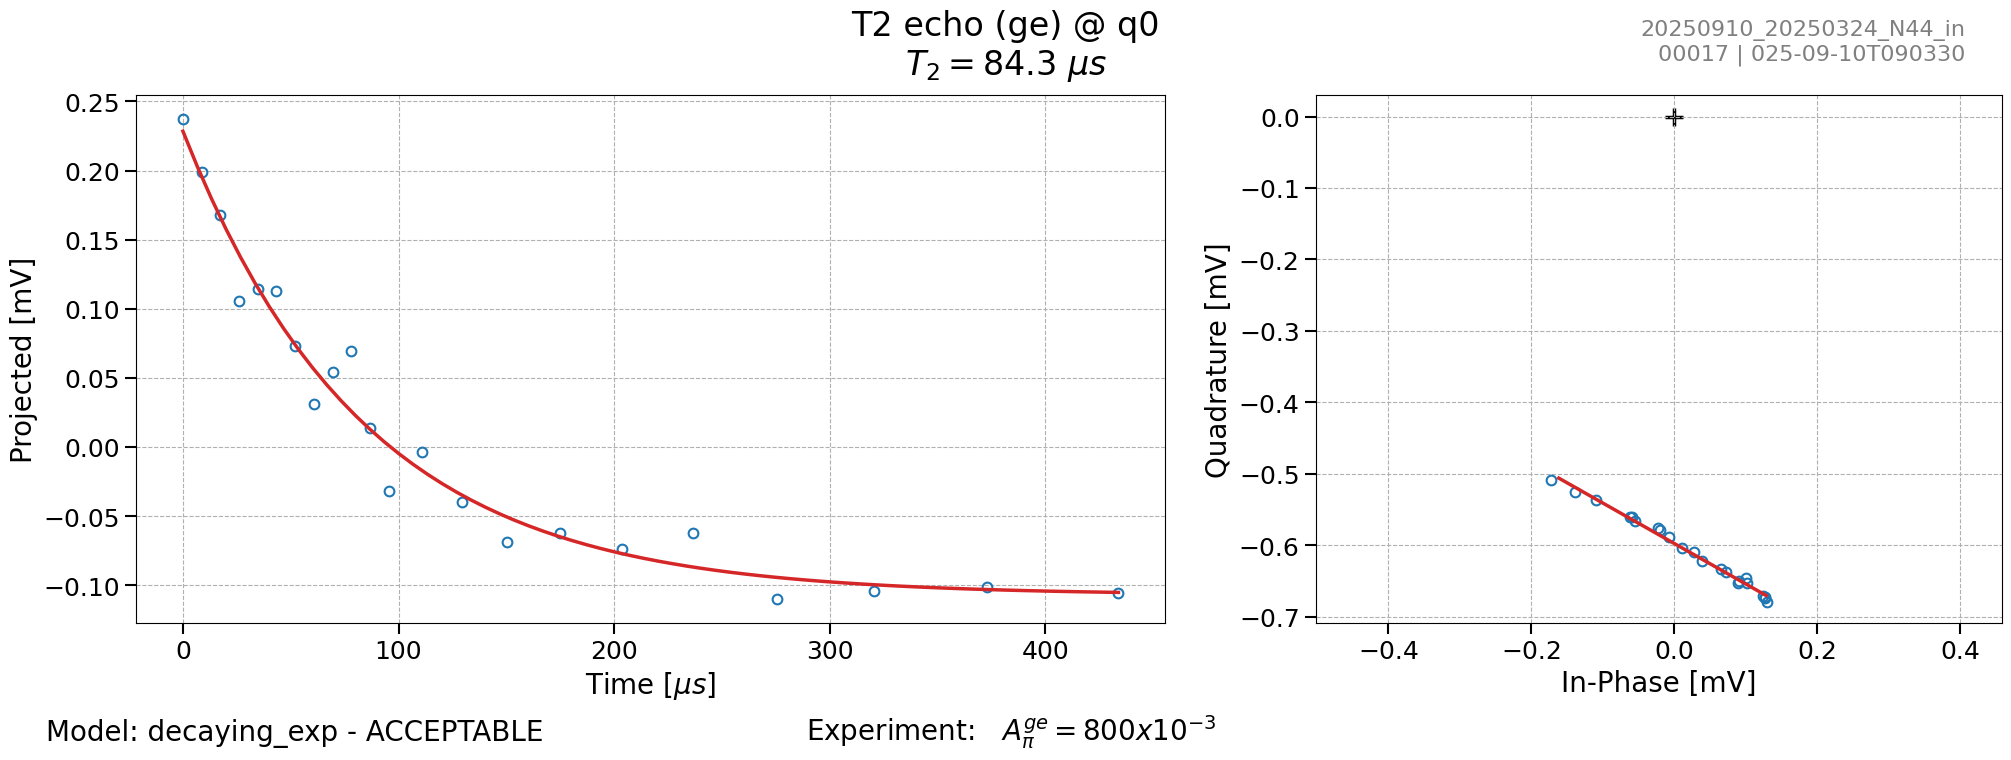

In [ ]:
from sqil_experiments.measurements.T2_echo import T2Echo, EchoExperimentOptions
import numpy as np
from laboneq.dsl.enums import AcquisitionType

T2_exp = T2Echo()

two_T1 = 2* T2_exp.qubit_value("ge_T1", "q0") or 100e-6
time = np.hstack(
    [
        np.linspace(0, two_T1, 11),
        np.logspace(np.log(two_T1 * 1.1), np.log(5 * two_T1), 11, base=np.e),
    ]
)

options = EchoExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**11


result = T2_exp.run(
    [time],
    # sweeps={"index": np.arange(2)},
    options=options
)

### Interleaved T1-echo

2025-09-12 12:10:31,931 - INFO - Successfully connected to zi


[2025.09.12 12:10:31.936] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.09.12 12:10:31.938] INFO    VERSION: laboneq 2.57.0
[2025.09.12 12:10:31.939] INFO    Connecting to data server at localhost:8004
[2025.09.12 12:10:31.941] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.09.12 12:10:31.948] INFO    Configuring the device setup
[2025.09.12 12:10:31.955] INFO    The device setup is configured


2025-09-12 12:10:31,965 - INFO - Setting up instruments
2025-09-12 12:10:31,966 - INFO - Before exp


[2025.09.12 12:10:31.977] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.09.12 12:10:31.978] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.09.12 12:10:31.979] INFO    Resolved modulation type of oscillator 'q0_drive_ef_osc' on signal 'q0/drive_ef' to HARDWARE
[2025.09.12 12:10:31.980] INFO    Starting LabOne Q Compiler run...
[2025.09.12 12:10:31.994] INFO    Schedule completed. [0.012 s]
[2025.09.12 12:10:32.013] INFO    Code generation completed for all AWGs. [0.018 s]
[2025.09.12 12:10:32.014] INFO    Completed compilation step 1 of 1. [0.032 s]
[2025.09.12 12:10:32.017] INFO     ──────────────────────────────────────────────────────────────── 
[2025.09.12 12:10:32.017] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.09.12 12:10:32.018] INFO     ──────────────────────────────────────────────────────────────── 
[2025.09.12 12:10:

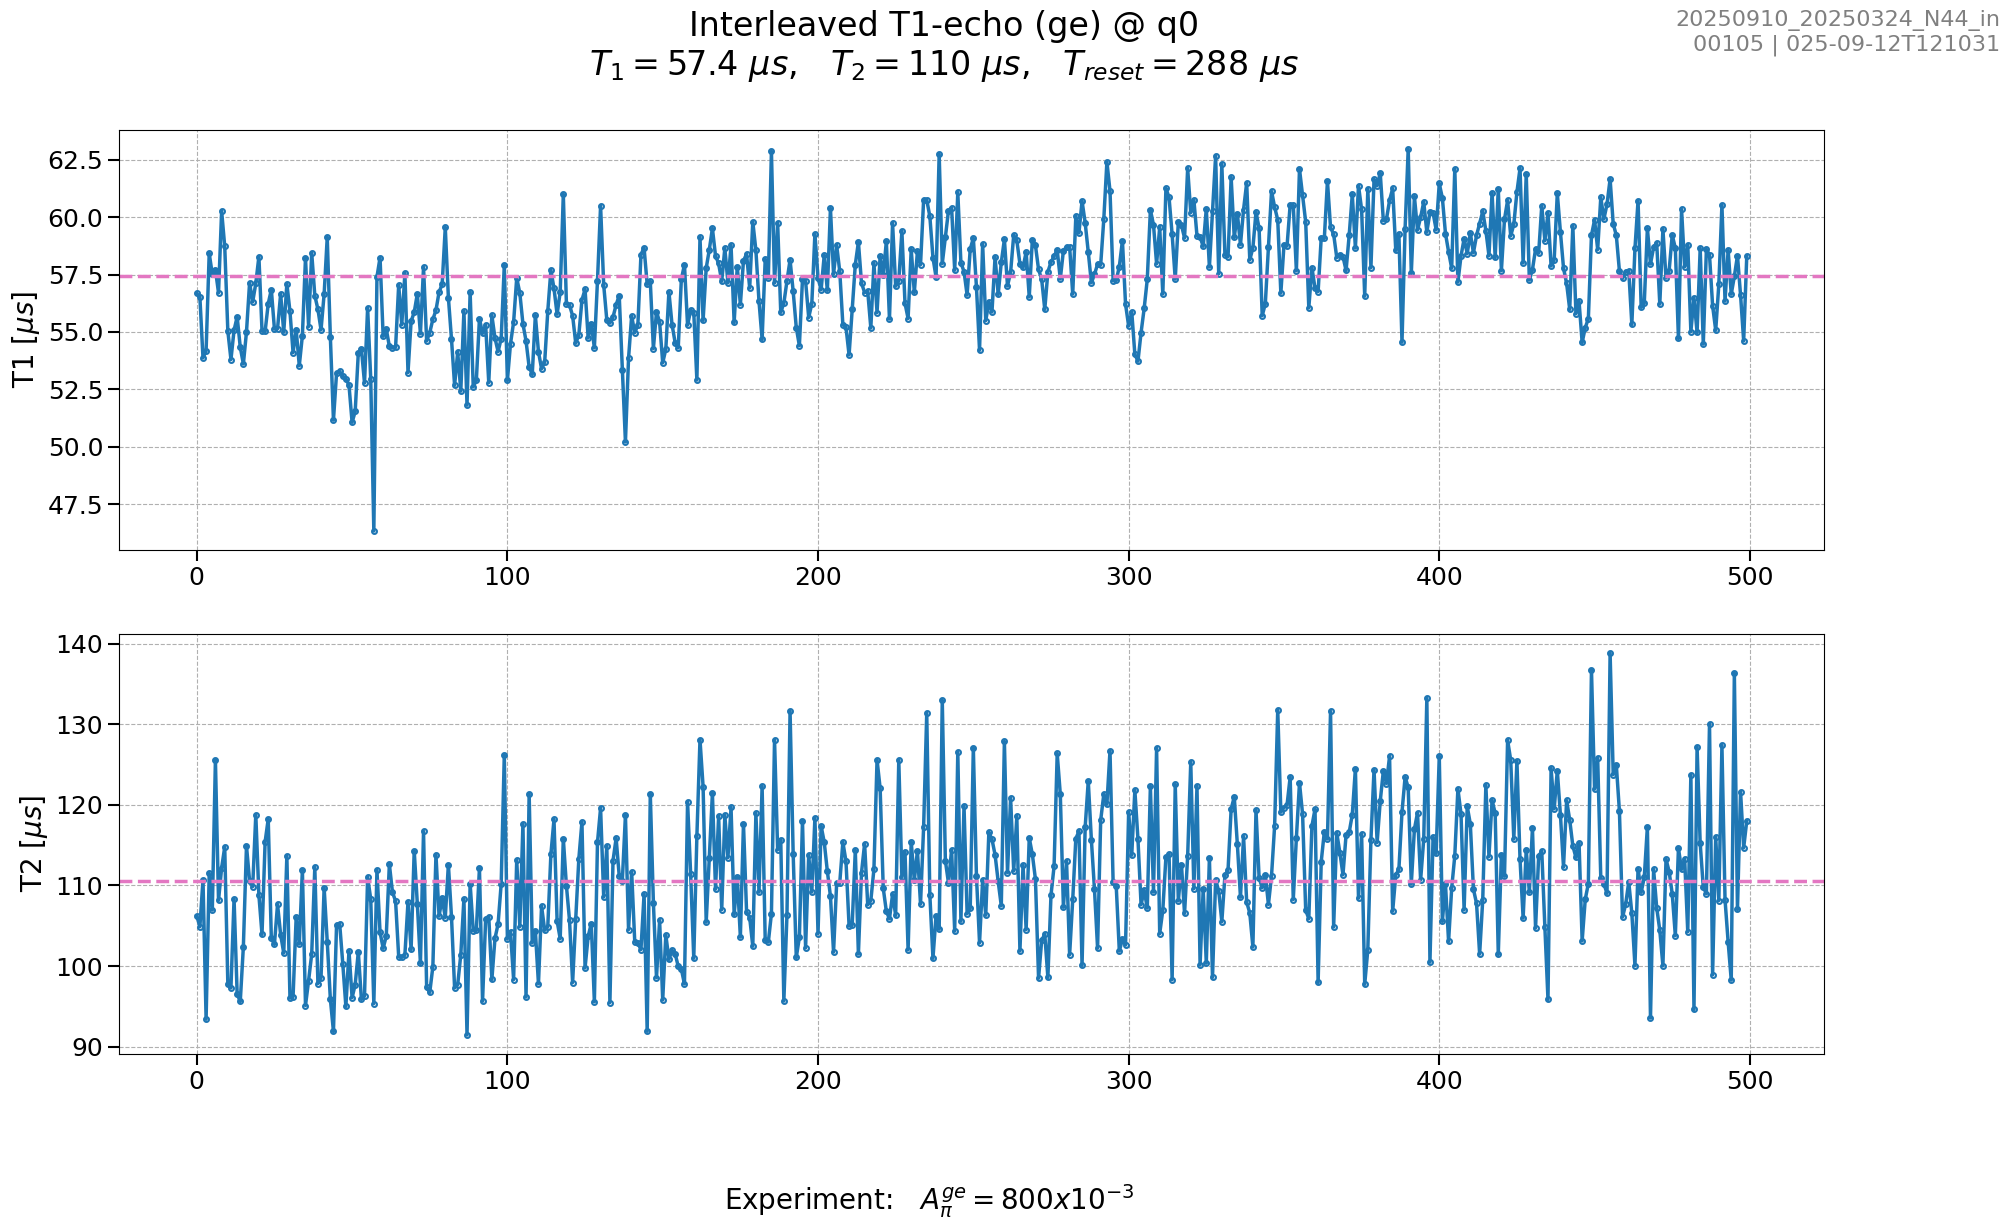

In [ ]:
from sqil_experiments.measurements.interleaved_T1_echo import InterleavedT1Echo
from sqil_experiments.measurements.T2_echo import EchoExperimentOptions
import numpy as np
from laboneq.dsl.enums import AcquisitionType

interleaved_exp = InterleavedT1Echo()

T1_value = interleaved_exp.qubit_value("ge_T1", "q0")
time = np.hstack(
    [
        np.linspace(0, T1_value, 11),
        np.logspace(np.log(T1_value * 1.1), np.log(5 * T1_value), 11, base=np.e),
    ]
)

options = EchoExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**11

result = interleaved_exp.run(
    [time],
    sweeps={"index": np.arange(500)},
    options=options
)

### Ramsey

2025-09-10 14:37:12,281 - INFO - Successfully connected to zi


[2025.09.10 14:37:12.286] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.09.10 14:37:12.288] INFO    VERSION: laboneq 2.57.0
[2025.09.10 14:37:12.289] INFO    Connecting to data server at localhost:8004
[2025.09.10 14:37:12.293] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.09.10 14:37:12.300] INFO    Configuring the device setup
[2025.09.10 14:37:12.309] INFO    The device setup is configured


2025-09-10 14:37:12,322 - INFO - Setting up instruments
2025-09-10 14:37:12,323 - INFO - Before exp


[2025.09.10 14:37:12.335] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.09.10 14:37:12.336] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.09.10 14:37:12.338] INFO    Starting LabOne Q Compiler run...
[2025.09.10 14:37:12.649] INFO    Schedule completed. [0.309 s]
[2025.09.10 14:37:12.931] INFO    Code generation completed for all AWGs. [0.281 s]
[2025.09.10 14:37:12.933] INFO    Completed compilation step 1 of 1. [0.593 s]
[2025.09.10 14:37:12.937] INFO     ──────────────────────────────────────────────────────────────── 
[2025.09.10 14:37:12.938] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.09.10 14:37:12.939] INFO     ──────────────────────────────────────────────────────────────── 
[2025.09.10 14:37:12.940] INFO      shfqc_0        0       3013            0           1      8000  
[2025.09.10 14:37:12.941] INFO      shfqc_0_

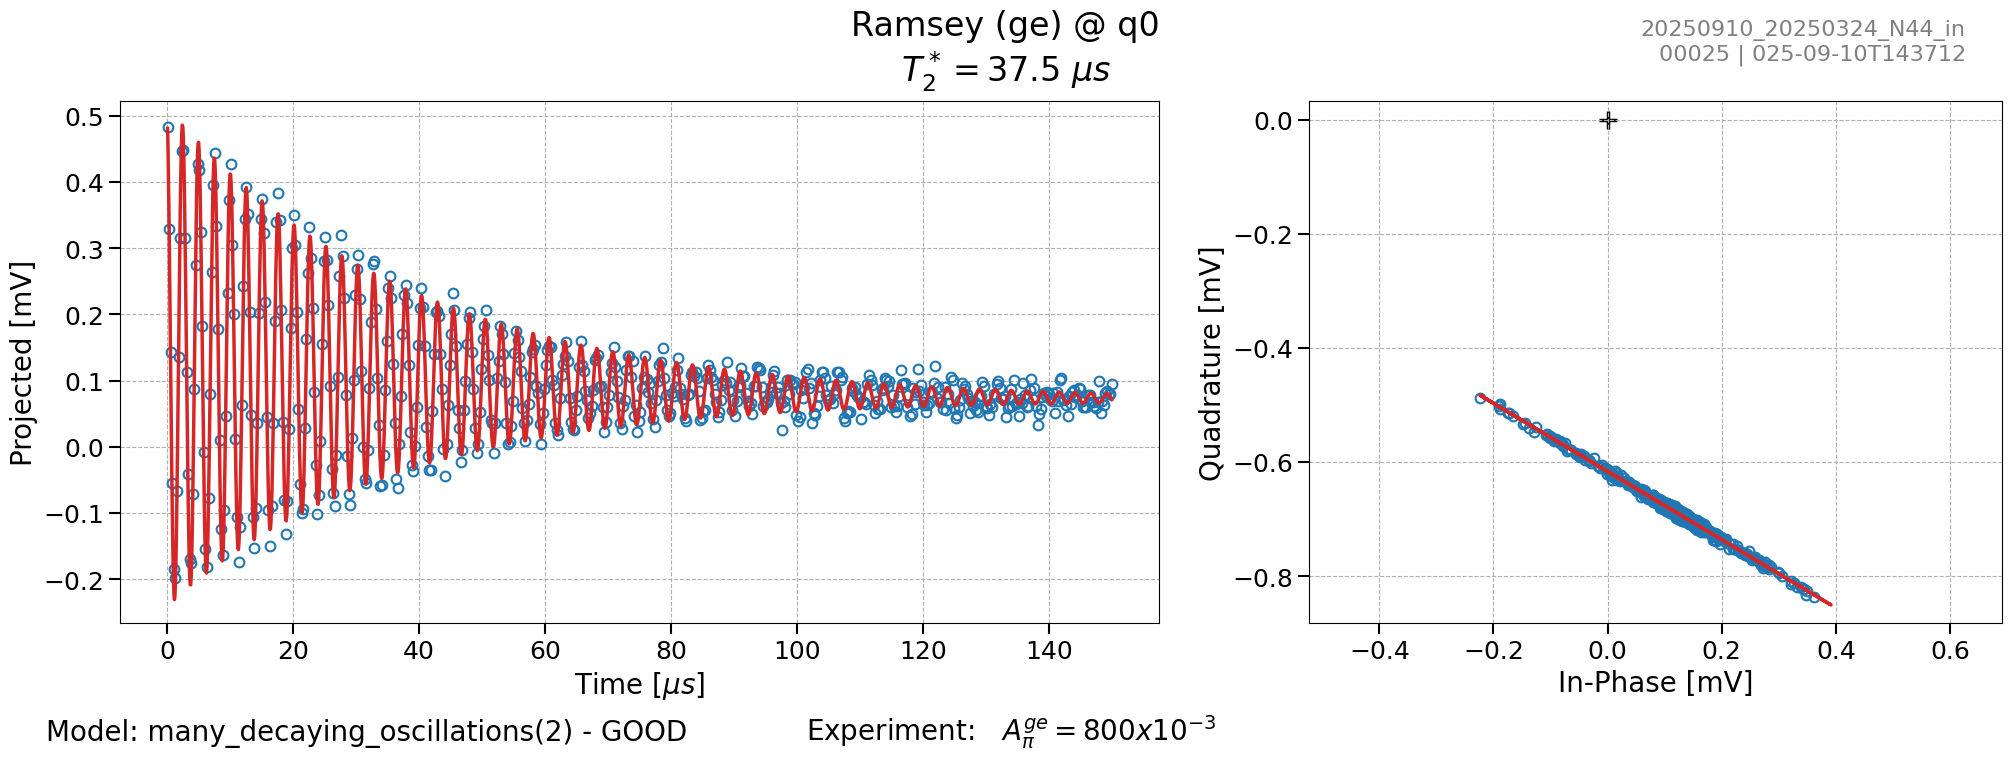

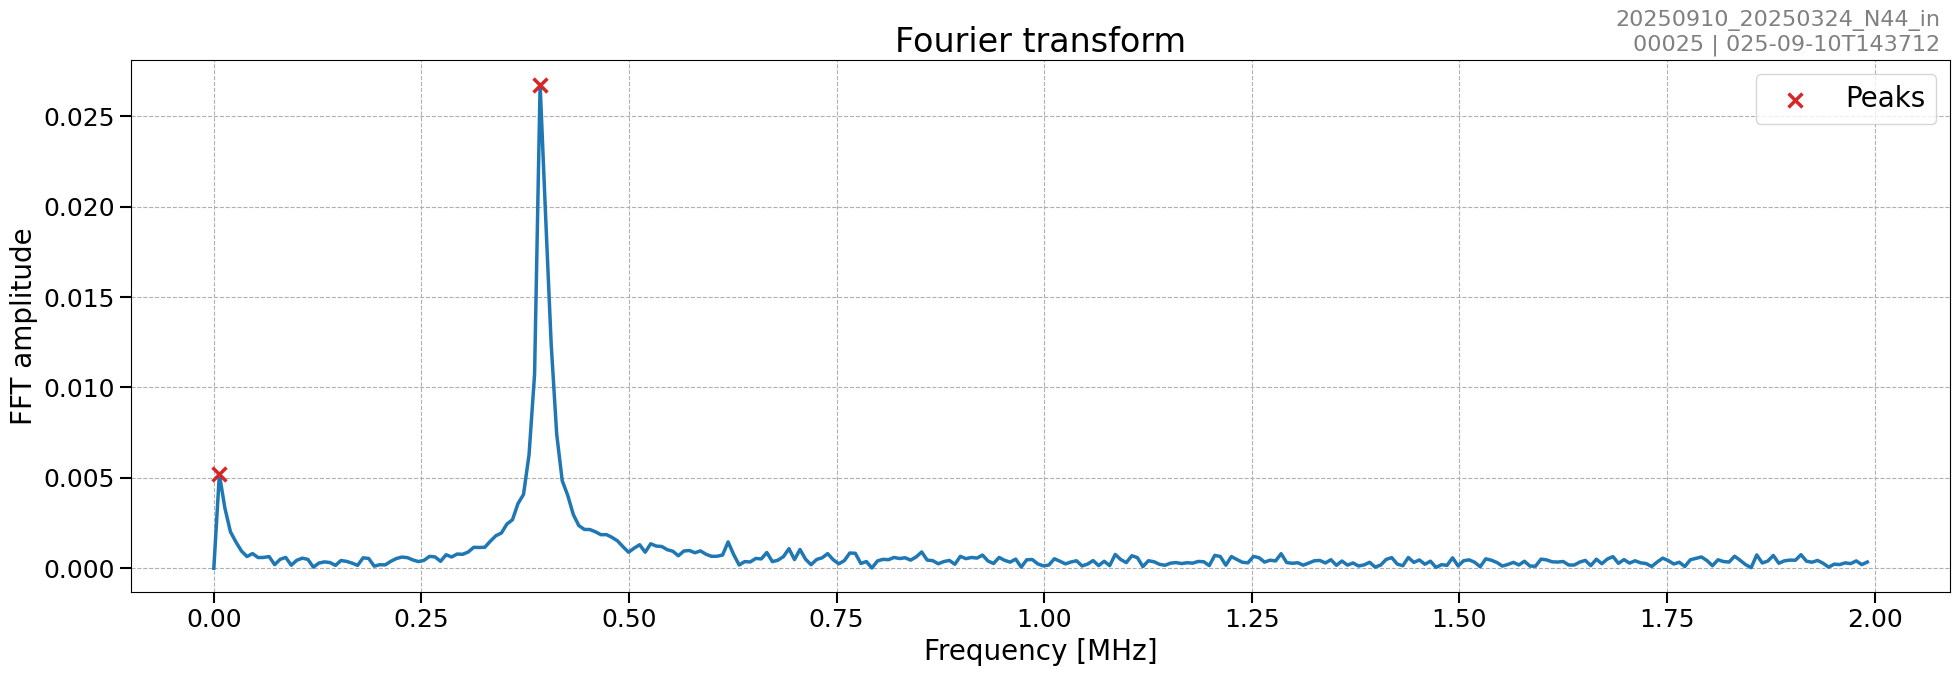

In [ ]:
from sqil_experiments.measurements.ramsey import Ramsey
import numpy as np
from laboneq_applications.experiments.options import (
    TuneupExperimentOptions,
)
from laboneq.dsl.enums import AcquisitionType

time = np.linspace(0.1e-6, 150e-6, 600)
detuning = 0.1e6

options = TuneupExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**10


ramsey_exp = Ramsey()
result = ramsey_exp.run(
    [time],
    [detuning],
    options=options,
)

### Tests

In [ ]:
import numpy as np
10 + 20 * np.log10(0.003)

np.float64(-40.45757490560675)

2025-08-03 20:28:20,792 - INFO - Successfully connected to zi


[2025.08.03 20:28:20.792] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.03 20:28:20.792] INFO    VERSION: laboneq 2.57.0
[2025.08.03 20:28:20.801] INFO    Connecting to data server at localhost:8004
[2025.08.03 20:28:20.808] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.03 20:28:20.815] INFO    Configuring the device setup
[2025.08.03 20:28:20.823] INFO    The device setup is configured


2025-08-03 20:28:20,826 - INFO - Setting up instruments
2025-08-03 20:28:20,827 - INFO - Before exp


[2025.08.03 20:28:20.838] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.03 20:28:20.839] INFO    Resolved modulation type of oscillator 'q0_drive_ef_osc' on signal 'q0/drive_ef' to HARDWARE
[2025.08.03 20:28:20.841] INFO    Starting LabOne Q Compiler run...
[2025.08.03 20:28:20.868] INFO    Schedule completed. [0.025 s]
[2025.08.03 20:28:20.890] INFO    Code generation completed for all AWGs. [0.022 s]
[2025.08.03 20:28:20.890] INFO    Completed compilation step 1 of 1. [0.049 s]
[2025.08.03 20:28:20.890] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.03 20:28:20.890] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.08.03 20:28:20.890] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.03 20:28:20.890] INFO      shfqc_0        0         21            0           1      8000  
[2025.08.03 20:28:20.900] INFO      shfqc_0_sg    

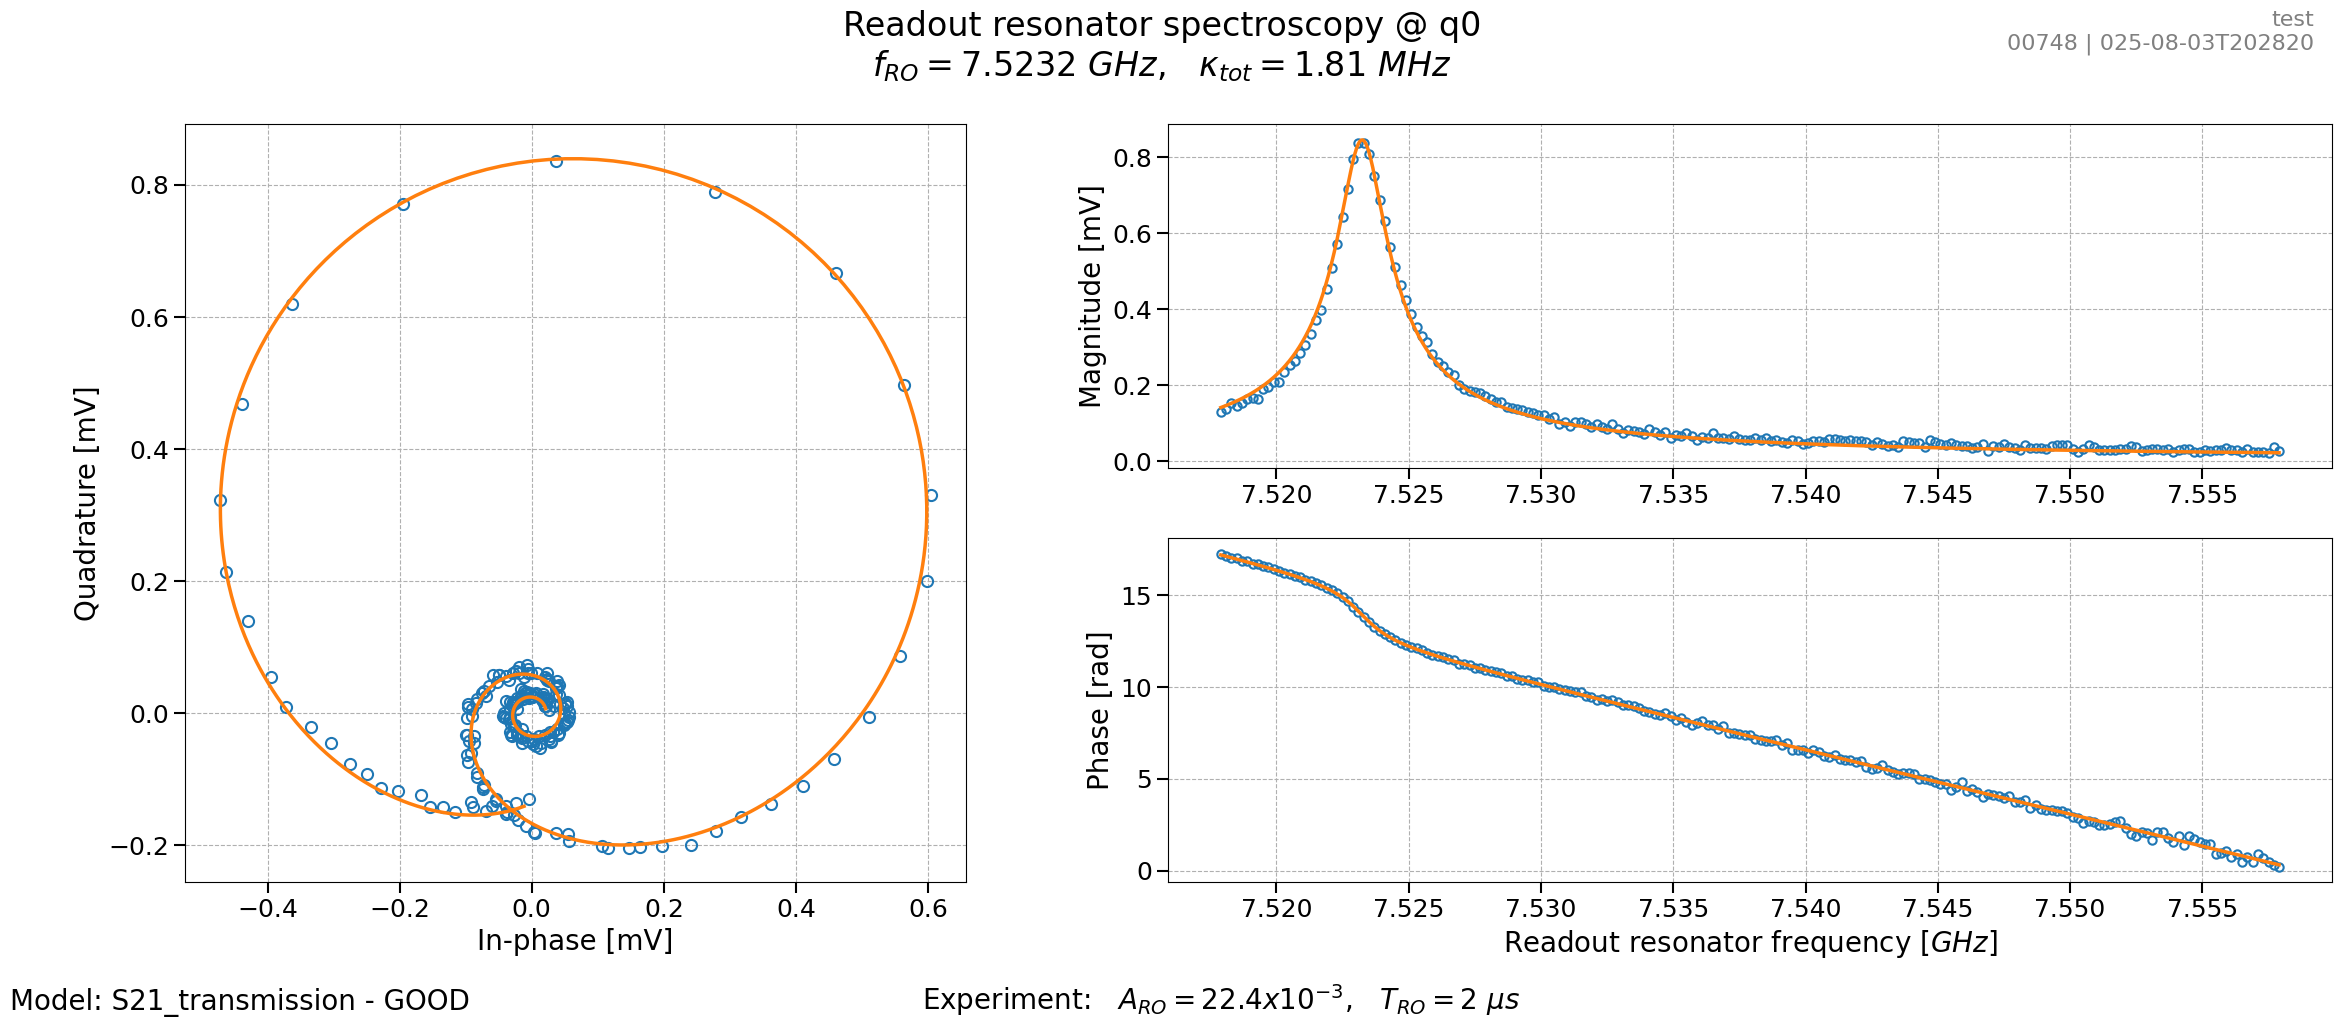

In [ ]:
import numpy as np
from rr_spec import RRSpec, ResonatorSpectroscopyExperimentOptions

ro_freq = 7.5379e9

rr_spec = RRSpec()
options = ResonatorSpectroscopyExperimentOptions()
options.count = 400

result = rr_spec.run(
    np.linspace(ro_freq + 20e6, ro_freq - 20e6, 201),
    # sweeps={"readout_amplitude": np.linspace(0.003, 0.03, 3)},
    # sweeps={"current": np.linspace(1e-4, 2e-4, 3)},
    options=options,
)

average relative std: 0.45369850227250913
average std: 9.460869266857227e-05
std of the std: 1.3977359178516824e-05
relative std over std avg: 0.14773863568204568


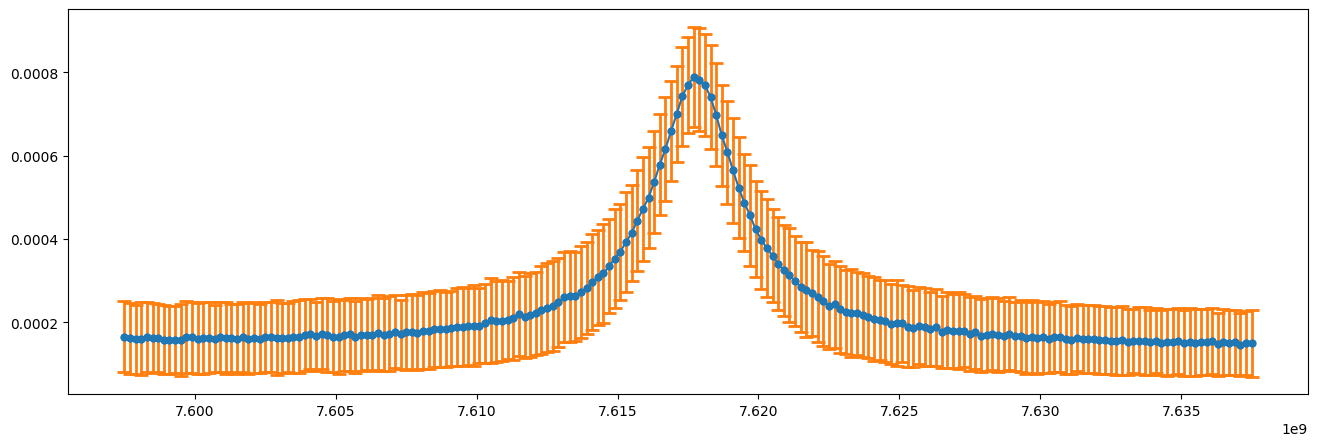

In [ ]:
import sqil_core as sqil
import matplotlib.pyplot as plt

# count = 2600
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00163-rr_spectroscopy_2025-05-14T012721"
# count = 1048
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00158-rr_spectroscopy_2025-05-14T012004"
# count = 200
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00165-rr_spectroscopy_2025-05-14T014453"
# count = 100
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00164-rr_spectroscopy_2025-05-14T012812"
# count = 2
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00159-rr_spectroscopy_2025-05-14T012109"

data, freq, sweep = sqil.extract_h5_data(
    path, ["data", "frequencies", "sweep0"]
)
linmag = np.abs(data[0])
print(
    "average relative std:", np.mean(np.std(linmag, axis=0) / np.mean(linmag, axis=0))
)
print("average std:", np.mean(np.std(linmag, axis=0)))
print("std of the std:", np.std(np.std(linmag, axis=0)))
print(
    "relative std over std avg:",
    np.mean(np.std(np.std(linmag, axis=0)) / np.mean(np.std(linmag, axis=0))),
)

plt.figure(figsize=(16, 5))
plt.errorbar(
    freq[0],
    np.mean(linmag, axis=0),
    np.std(linmag, axis=0),
    fmt="-o",
    color="tab:blue",
    label="Mean with Error",
    ecolor="tab:orange",
    capsize=5,
    capthick=2,
    elinewidth=2,
    markersize=5,
)
plt.show()

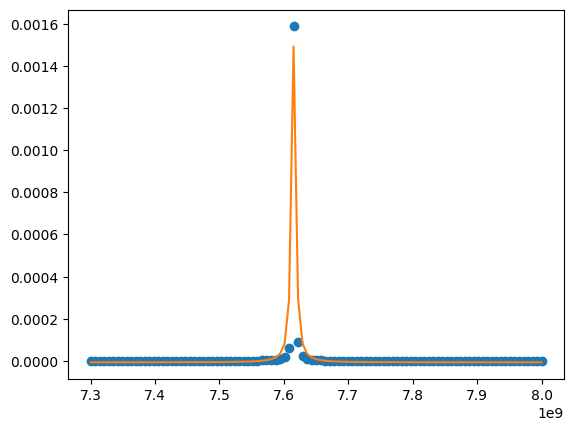

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-12\00011-rr spectroscopy_2025-05-12T231453"

data, freq = sqil.extract_h5_data(path, ["data", "frequencies"])

fit_res = sqil.fit.fit_lorentzian(freq, np.abs(data)**2)

plt.plot(freq, np.abs(data)**2, 'o')
plt.plot(freq, fit_res.predict(freq))
plt.show()

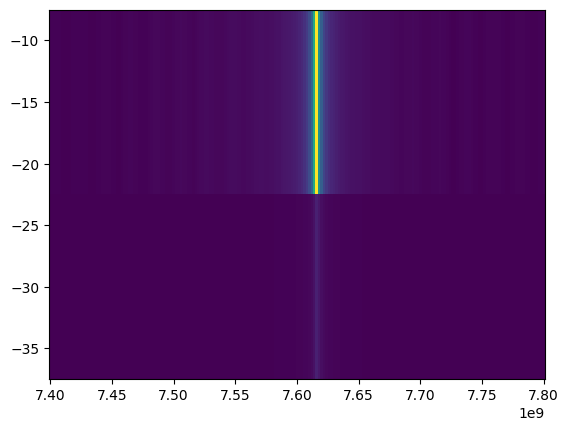

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-13\00029-rr spectroscopy_2025-05-13T005313"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

# for d, f, s in zip(data, freq, sweep):
#     plt.plot(f, np.abs(d), label=s)
# plt.legend()

plt.pcolormesh(freq[0], sweep, np.abs(data))

(201,) (2,) (2, 201)


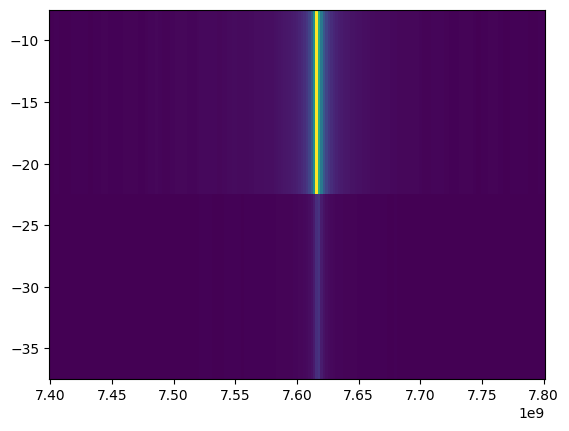

In [ ]:
path = r"Z:\Projects\BottomLoader\data\20250430_Transmon_20250207_multi_Fl_NbAl_N45\2025-05-13\00429-pulsed_onetone_vs_ro_power_2025-05-13T003736"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "ro_freq", "sweep_param"])
plt.pcolormesh(freq[0], sweep, np.abs(data))

print(freq[0].shape, sweep.shape, data.shape)

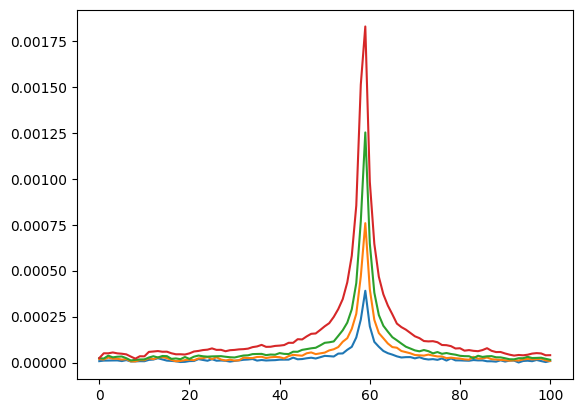

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-13\00126-rr spectroscopy_2025-05-13T222549"

data, freq, sweep0, sweep1 = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0", "sweep1"])

data.shape, freq.shape, sweep0.shape, sweep1.shape

plt.plot(np.abs(data).T)